In [1]:
import pandas as pd
from pandas import DataFrame as df
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
list_name = ['时间t','入库洪水流量','时均洪水流量','下泄流量','deta_V','V', 'Z']

In [219]:
V = np.array([4330,4800,5310,5860,6450,7080,7760,8540,9420,10250])
Q = np.array([0,22.5,55,105,173.9,267.2,378.3,501.9,638.9,786.1])
y = V
y2 = Q
X = np.array([36,36.5,37,37.5,38,38.5,39,39.5,40,40.5]).reshape(-1, 1)
X1 = Q.reshape(-1,1)
X2 = V.reshape(-1, 1)
y3 = np.array([36,36.5,37,37.5,38,38.5,39,39.5,40,40.5])

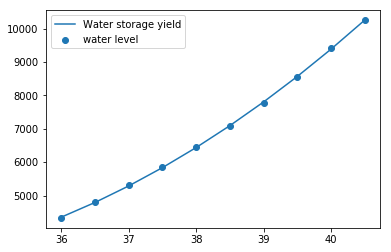

In [94]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)
pr = linear_model.LinearRegression()
pr.fit(X_quad, y) 
y_quad_fit = pr.predict(quadratic.fit_transform(X)) 
plt.scatter(X, y, label='water level')
plt.plot(X, y_quad_fit, label='Water storage yield')
plt.legend(loc='upper left')

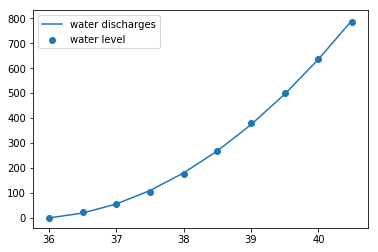

In [91]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)
pr2 = linear_model.LinearRegression()
pr2.fit(X_quad, y2) 
y_quad_fit = pr.predict(quadratic.fit_transform(X)) 
plt.scatter(X, y2, label='water level')
plt.plot(X, y_quad_fit, label='water discharges')
plt.legend(loc='upper left')

In [95]:
pr.predict(quadratic.fit_transform(np.array([38]).reshape(-1, 1)))

array([6437.57575758])

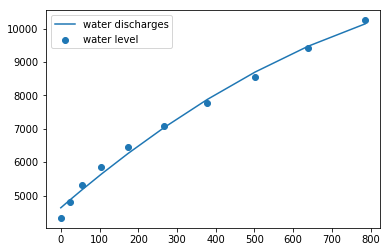

In [143]:
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X1)
pr3 = linear_model.LinearRegression()
pr3.fit(X_quad, y) 
y_quad_fit = pr3.predict(quadratic.fit_transform(X1)) 
plt.scatter(X1, y, label='water level')
plt.plot(X1, y_quad_fit, label='water discharges')
plt.legend(loc='upper left')

In [218]:
x = 602

pr3.predict(quadratic.fit_transform(np.array([x]).reshape(-1, 1))) - 9670.56 + (173.9 *1.08/2) - 325*1.08 + x* 1.08

array([0.526665])

In [146]:
pr3.predict(quadratic.fit_transform(np.array([260]).reshape(-1, 1)))

array([6981.33005104])

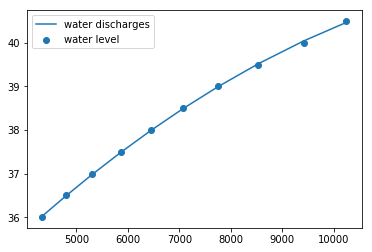

In [223]:
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X2)
pr4 = linear_model.LinearRegression()
pr4.fit(X_quad, y3) 
y_quad_fit = pr4.predict(quadratic.fit_transform(X2)) 
plt.scatter(X2, y3, label='water level')
plt.plot(X2, y_quad_fit, label='water discharges')
plt.legend(loc='upper left')

In [231]:
st = [6450, 6529.434, 6938.214, 8096.514, 9392.082, 10065.354, 10326.39, 10351.716, 10226.814, 9983.652, 9670.56, 9336.354]
for dt in st:
    print(pr4.predict(quadratic.fit_transform(np.array(dt).reshape(-1, 1))))

[37.99149229]
[38.05703914]
[38.38500714]
[39.22931324]
[40.02478742]
[40.37609395]
[40.50087791]
[40.51264493]
[40.4540302]
[40.33572623]
[40.17524331]
[39.99380649]


In [242]:
t = [i for i in range(18,52,3)]
t

[18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51]

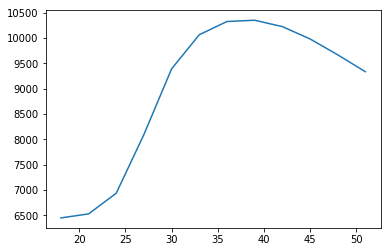

In [245]:
plt.plot(t, st)

In [20]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3)   #max_depth设置树深
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [21]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return 

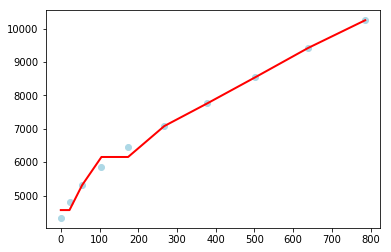

In [37]:
lin_regplot(X, y, tree)

In [29]:
cla_data = np.array([20,150,900,850,600,400,300,200,120])
T = np.array([i for i in range(9)])
print(T)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [16]:
from scipy.interpolate import interp1d

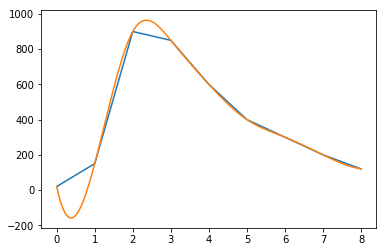

In [31]:
plt.plot(T,cla_data)
plt.plot(xnew,power_smooth)
plt.show()

In [22]:
def cal_iflow(data, t1, t2):
    return data.loc[t2, '入库洪水流量'] - data.loc[t1, '入库洪水流量']

In [23]:
def cal_oflow(data, t1, t2):
    return data.loc[t2, '下泄流量'] - data.loc[t1, '下泄流量']